In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
try:
    # Intentar leer el archivo localmente
    data = pd.read_csv('../data/Steel_industry_data.csv')
except FileNotFoundError:
    # Si no se encuentra, leer desde la URL
    data = pd.read_csv('https://raw.githubusercontent.com/luis-huacho/INF648-Proy-Curso-2024-01/main/data/Steel_industry_data.csv')

# Seleccionar las columnas para la regresión
features = data.drop(columns=['date', 'Load_Type'])
target = data['Load_Type']

In [9]:
categorical_features = features[['WeekStatus', 'Day_of_week']]

In [10]:
numerical_features = features.drop(columns=categorical_features)

In [11]:
X_categorical = pd.get_dummies(categorical_features, columns=["Day_of_week", "WeekStatus"], drop_first=False)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_numerical = scaler.fit_transform(numerical_features)
X_numerical_ = pd.DataFrame(X_numerical, columns=numerical_features.columns)

In [13]:
X = pd.concat([X_numerical_, X_categorical], axis=1)

In [16]:
y = target

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression

# Ajuste del modelo SVM con C=1
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
# Realiza predicciones
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# Imprime el reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

  Light_Load       0.90      0.91      0.90      3572
Maximum_Load       0.59      0.60      0.60      1499
 Medium_Load       0.62      0.60      0.61      1937

    accuracy                           0.76      7008
   macro avg       0.70      0.70      0.70      7008
weighted avg       0.75      0.76      0.75      7008

[[3241   89  242]
 [ 117  902  480]
 [ 258  525 1154]]


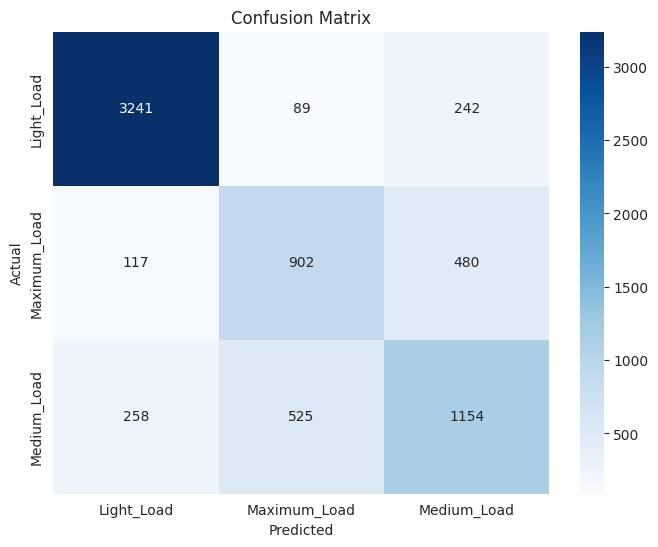

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


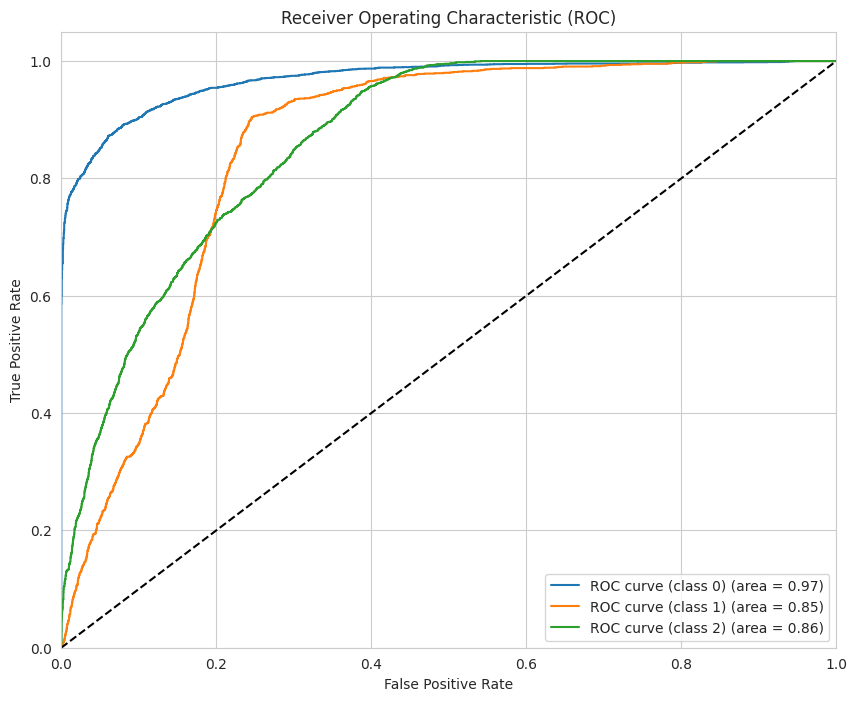

In [24]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Binarizar el target
y_bin = label_binarize(y, classes=model.classes_)
n_classes = y_bin.shape[1]

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Modelo OneVsRest para ROC-AUC
clf = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=1000))
clf.fit(X_train, y_train)
y_score = clf.decision_function(X_test)

# Calcular la curva ROC y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Gráfico de las curvas ROC
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


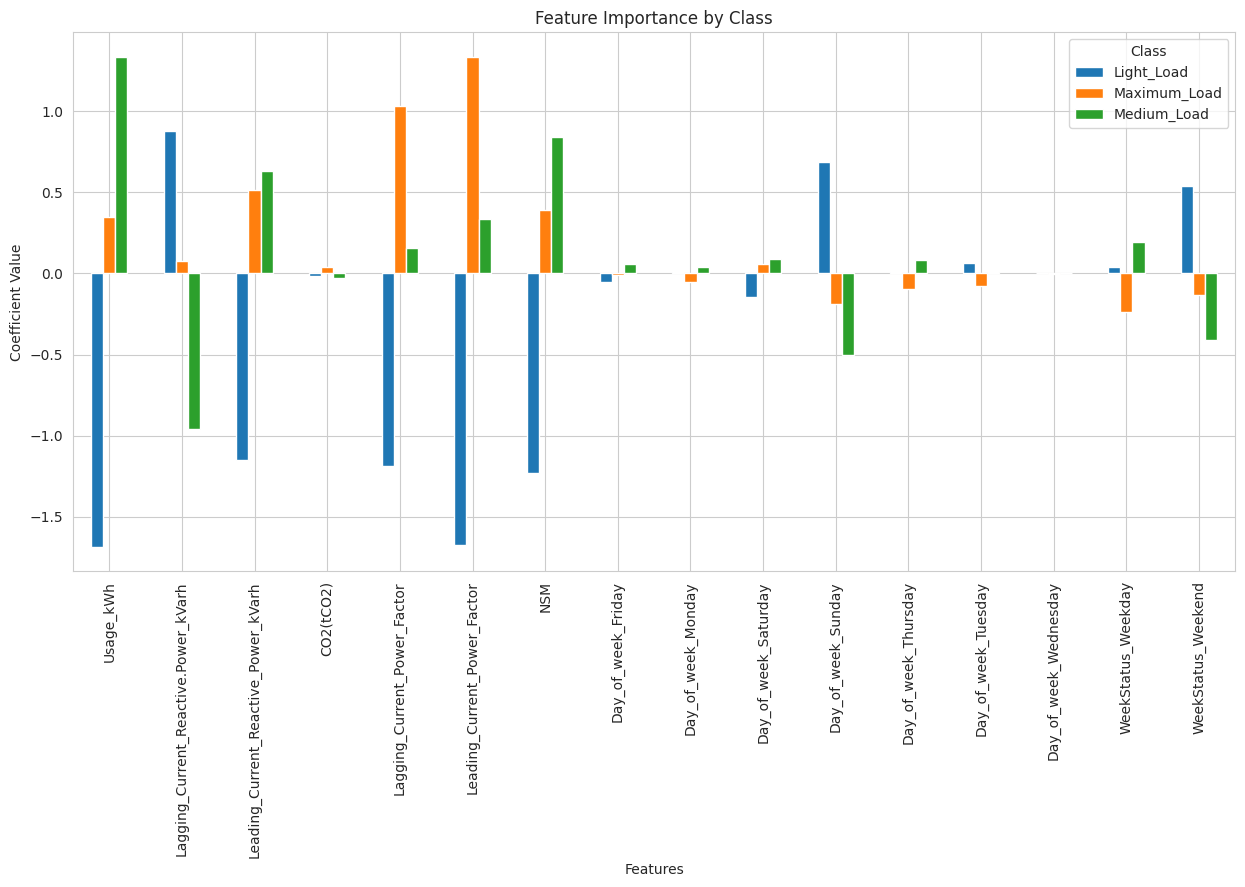

In [25]:
import numpy as np

# Coeficientes del modelo
coefficients = model.coef_

# Crear un dataframe de los coeficientes
coef_df = pd.DataFrame(coefficients.T, index=X.columns, columns=model.classes_)

# Gráfico de los coeficientes
coef_df.plot(kind='bar', figsize=(15, 7))
plt.title('Feature Importance by Class')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.legend(title='Class')
plt.show()
